<a href="https://colab.research.google.com/github/neuralsrg/EEG/blob/main/data_exploration/datasets/DSGenerator_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DSGenerator tutorial (.EDF datasets)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
from typing import Optional, List, Set, Tuple, Sequence

import sys
sys.path.append('/content/drive/MyDrive/lib') # should read mne from here
sys.path.append('/content') # should read DSGenerator from here

import mne
import DSGenerator

## Creating generator object

In [5]:
path1 = '/content/drive/MyDrive/EEG_data/relabeled_unpacked/Bashirin_phonemes_.EDF'
path2 = '/content/drive/MyDrive/EEG_data/relabeled_unpacked/Bondarev_phonemes_.EDF'

generator = DSGenerator.WindowGenerator([path1, path2])

Extracting EDF parameters from /content/drive/MyDrive/EEG_data/relabeled_unpacked/Bashirin_phonemes_.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/EEG_data/relabeled_unpacked/Bondarev_phonemes_.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Creating RawArray with float64 data, n_channels=69, n_times=1321308
    Range : 0 ... 1321307 =      0.000 ...  1313.374 secs
Ready.


All the data was normalized. Refer to normalization coefficient as WindowGenerator().normalize


It tells us that each electrode channel was normalized to [-1, 1].
We have 68 electrodes; hence, the `normalization coefficient` has shape (68, 1).
You can retrieve it using `generator.normalize`:

In [6]:
generator.normalize.shape

(68, 1)

## Lets learn our data!

Since we have 2 .EDF files, we will get 2 `<Info> ` objects.

`pd.DataFrame()` was computed over concatenated .EDF files



In [7]:
generator.eeg_info()

<Info | 7 non-empty values
 bads: []
 ch_names: EEG O1-M1, EEG O2-M2, EEG P3-M1, EEG P4-M2, EEG C3-M1, EEG ...
 chs: 69 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 503.0 Hz
 meas_date: 2020-02-15 16:49:00 UTC
 nchan: 69
 projs: []
 sfreq: 1006.0 Hz
> 

<Info | 7 non-empty values
 bads: []
 ch_names: EEG O1-M1, EEG O2-M2, EEG P3-M1, EEG P4-M2, EEG C3-M1, EEG ...
 chs: 69 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 503.0 Hz
 meas_date: 2020-03-05 15:00:00 UTC
 nchan: 69
 projs: []
 sfreq: 1006.0 Hz
> 



,count,mean,std,min,25%,50%,75%,max
EEG O1-M1,1321308.0,-0.000013,0.074834,-1.000000,-0.032134,0.001285,0.034704,0.877892
EEG O2-M2,1321308.0,0.000019,0.115777,-0.948370,-0.059783,0.000000,0.062500,1.000000
EEG P3-M1,1321308.0,-0.000013,0.064176,-1.000000,-0.030534,0.000000,0.031807,0.866412
EEG P4-M2,1321308.0,0.000049,0.127479,-0.947205,-0.074534,0.000000,0.077640,1.000000
EEG C3-M1,1321308.0,0.000012,0.056683,-1.000000,-0.026726,0.000000,0.026726,0.785078
...,...,...,...,...,...,...,...,...
v 7 3,1321308.0,-0.000016,0.099354,-1.000000,-0.060461,0.000000,0.062053,0.965792
v 7 4,1321308.0,0.000004,0.080312,-1.000000,-0.048862,0.000000,0.048862,0.882195
v 7 5,1321308.0,0.000015,0.070855,-1.000000,-0.042745,0.000000,0.042745,0.788682
v 7 6,1321308.0,0.000022,0.068370,-1.000000,-0.040533,0.000000,0.040533,0.786335


# Generate datasets

There are two ways to generate datasets:

1. Using `default` noise intervals (bad way, since these intervals will overlap other labeled intervals)
2. Using our own noise intervals. You can create them `manually` or `load` .json files from my [GitHub](https://github.com/neuralsrg/EEG/tree/main/data_exploration/datasets)

#### Default noise intervals initialization

Total number of intervals (before windowing): 240
If you want to generate noise indices, this is an exact length of np.array you have to pass to create_dataset()

Noise intervals overlap with labels. Please check them and set manually!


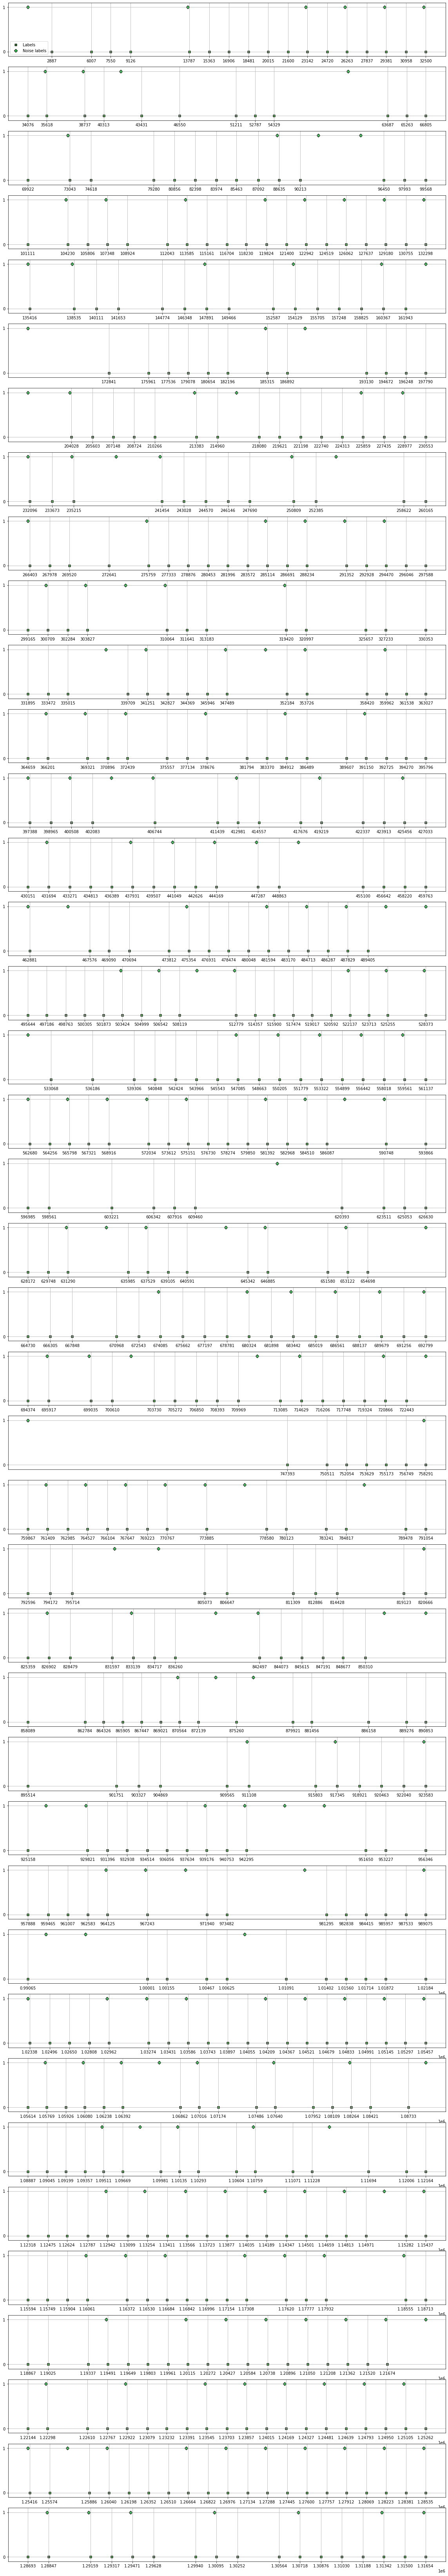

In [8]:
generator.create_dataset(plots=40) # here plots defines the number of subplots

In the plot above, `Labels (X)` are event labels (like 14, 4, 13, 3, 17, 7 etc.) They are not filtered so that you can manually initialize noise positions.

`generator` ***filtered*** 240 total intervals (240 Listen events, 240 Repeat events) which we can use in training. Other labels (wrong edf labels) were omitted.

`generator` warned us that **Noise** intervals overlap with Labels. This is not what we want for our dataset. We have to pass `indices_noise` argument to `create_dataset()` to tell generator which noise intervals to use. I have already computed them for bash.EDF and both bash.EDF & bond.EDF concatenated (like in our case). Lets load my initializations!

#### Loading Noise intervals

In [ ]:
# NOTE: You can also download them with:
# ! wget https://raw.githubusercontent.com/neuralsrg/EEG/main/data_exploration/datasets/bash_noise.json -O /destination/path/file.json

path_bash = tf.keras.utils.get_file(
    fname='bash_noise.json',
    origin='https://raw.githubusercontent.com/neuralsrg/EEG/main/data_exploration/datasets/bash_noise.json'
)

path_bash_bond = tf.keras.utils.get_file(
    fname='bash_and_bond_noise.json',
    origin='https://raw.githubusercontent.com/neuralsrg/EEG/main/data_exploration/datasets/bash_and_bond_noise.json'
)

In [36]:
import codecs, json 

obj_text = codecs.open(path_bash, 'r', encoding='utf-8').read()
loaded = json.loads(obj_text)
bash_noise_initialization = np.array(loaded)

obj_text = codecs.open(path_bash_bond, 'r', encoding='utf-8').read()
loaded = json.loads(obj_text)
bash_bond_noise_initialization = np.array(loaded)

bash_noise_initialization.shape, bash_bond_noise_initialization.shape

((116,), (240,))

Since we used both EDF files, we will initialize intervals with `bash_bond_noise_initialization`

Total number of intervals (before windowing): 240
If you want to generate noise indices, this is an exact length of np.array you have to pass to create_dataset()
listen.shape : (240, 68, 300)
noise.shape : (240, 68, 300)
Total number of elements in the dataset: 480
train dataset contains 384 elements
val dataset contains 96 elements

Refer to datasets as:
	 WindowGenerator().train
	 WindowGenerator().val
Note: If Noise == True then Noise is encoded with label 0
Second priority is always Listen and then Repeat


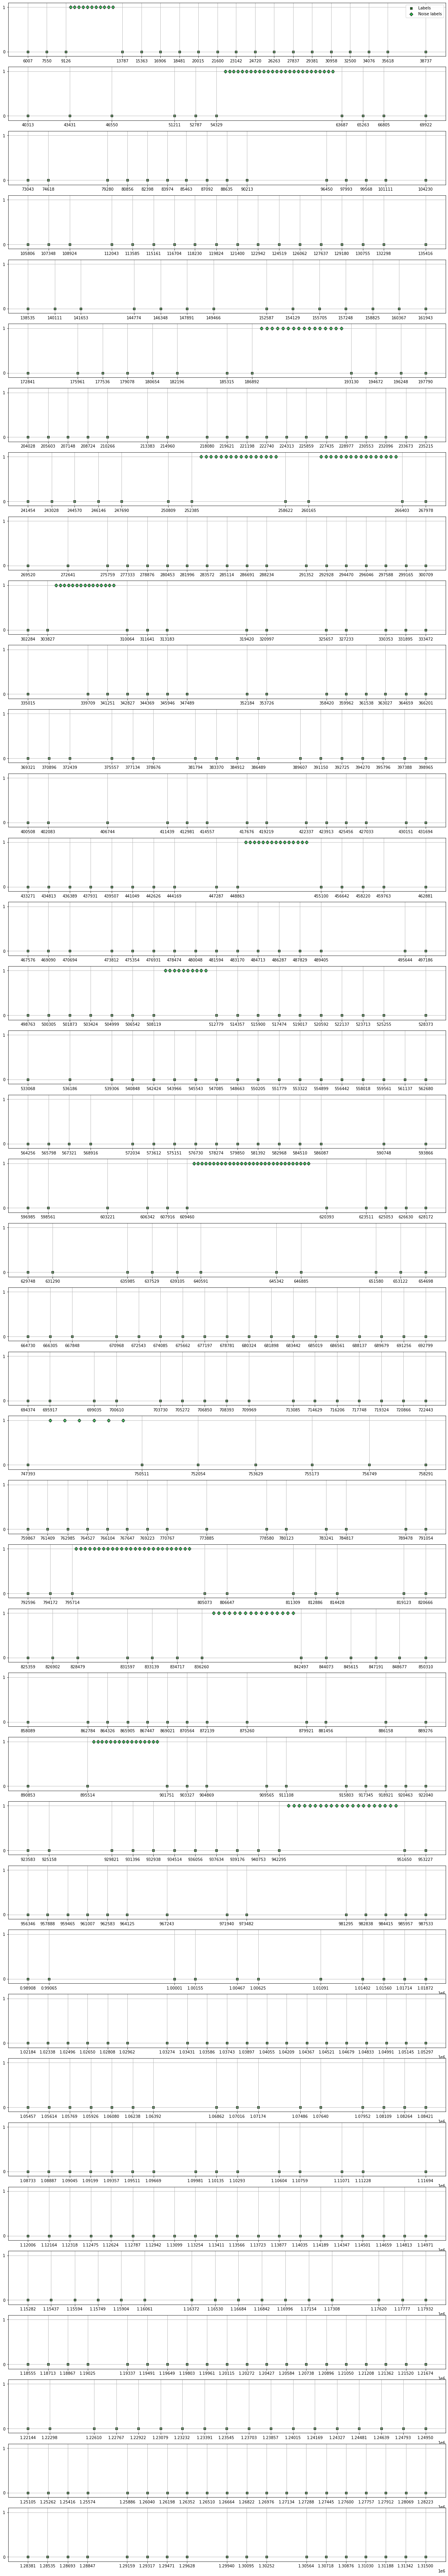

In [37]:
generator.create_dataset(plots=40, indices_noise=bash_bond_noise_initialization)

As you can see, now everythins is OK and we can use our datasets to train model!

# Other create_dataset() arguments:

`event_length` time lapse after each label to include in dataset (in ms since frequency ~ 1000Hz)

`indices_noise` loaded / created indices for noise data (first indices in each interval)

`plot_indices` whether to plot indices to check if they overlap

`skip_in_repeat` shift each repeat interval to the right by skip_in_repeat features

`listen_repeat_noise` which data to include in dataset (for example, [True, False, True] means to use only Listen and Noise data. Note that there must be at least 2 True values in the list)

`train_val_test` train / val / test ratios

`batch_size` batch size

`channels` which channels to use (index array)

`split_windows` whether to split time intervals into smaller windows
	 
`window_size` if split_windows, window size

`shift` if split_windows, hop size between each window (if None, then shift = window_size)

`stride` if split_windows, distance between single window elements (not recommended to change). See [tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#window) for details

`axis` Dataset dimensionality. Either 'bcf' (batch, channel, features) or 'bfc' (batch, features, channel) (for RNNs)

`plots` number of subplots in indices plot 

`verbose` verbosity mode 

In [38]:
# example

generator.create_dataset(split_windows=False,
                         channels=np.arange(19, 68),
                         axis='bfc',
                         batch_size=32,
                         listen_repeat_noise=[True, True, False],
                         train_val_test=[.6, .2, .2],
                         plot_indices=False,
                         indices_noise=bash_bond_noise_initialization)

Total number of intervals (before windowing): 240
If you want to generate noise indices, this is an exact length of np.array you have to pass to create_dataset()
listen.shape : (240, 300, 49)
repeat.shape : (240, 300, 49)
Total number of elements in the dataset: 480
train dataset contains 288 elements
val dataset contains 96 elements
test dataset contains 96 elements

Refer to datasets as:
	 WindowGenerator().train
	 WindowGenerator().val
	 WindowGenerator().test
Note: If Noise == True then Noise is encoded with label 0
Second priority is always Listen and then Repeat


In [ ]:
# model fit() example

model.fit(
    x=generator.train,
    epochs=20,
    validation_data=generator.val
)

# Windows

You can also split all your intervals into smaller windows:

In [39]:
# example with windows

generator.create_dataset(split_windows=True,
                         channels=np.arange(0, 68),
                         window_size=64,
                         shift=32,
                         batch_size=32,
                         listen_repeat_noise=[True, False, True],
                         train_val_test=[.8, .2], # only train and val will be generated
                         plot_indices=False,
                         indices_noise=bash_bond_noise_initialization)

Total number of intervals (before windowing): 240
If you want to generate noise indices, this is an exact length of np.array you have to pass to create_dataset()
listen.shape : (1920, 68, 64)
noise.shape : (1920, 68, 64)
Total number of elements in the dataset: 3840
train dataset contains 3072 elements
val dataset contains 768 elements

Refer to datasets as:
	 WindowGenerator().train
	 WindowGenerator().val
Note: If Noise == True then Noise is encoded with label 0
Second priority is always Listen and then Repeat
